In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import queue
%matplotlib inline

In [3]:
tp = pd.read_csv('capture20110818.pcap.netflow.labeled.csv', chunksize=1000)
df = pd.concat(tp, ignore_index=True)

# preprocessing
ips = df['SrcIPAddr:Port'].str.split(':')
df['SrcIPAddr'] = ips.str[0]
df['SrcIPPort'] = ips.str[-1]
ips = df['DstIPAddr:Port'].str.split(':')
df['DstIPAddr'] = ips.str[0]
df['DstIPPort'] = ips.str[-1]

# # df.dtypes
# ips = df['SrcIPAddr:Port'].str.split(':')
# print(ips)

# # print(pd.sort(ips[0:-1]))
# df['SrcIPAddr'] = (ips.str[0:-1])
# df['SrcIPPort'] = ips.str[-1]
# ips = df['DstIPAddr:Port'].str.split(':')
# df['DstIPAddr'] = ':'.join(ips[0:-1])
# df['DstIPPort'] = ips.str[-1]
df.head()

,Date,Flow_start,Durat,Prot,SrcIPAddr:Port,tmp,DstIPAddr:Port,Flags,Tos,Packets,Bytes,Flows,Label,Labels,SrcIPAddr,SrcIPPort,DstIPAddr,DstIPPort
0,2011-08-18,10:19:13.328,0.002,TCP,147.32.86.166:33426,->,212.24.150.110:25443,FRPA_,0,4,321,1,Background,NaN,147.32.86.166,33426,212.24.150.110,25443
1,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,->,147.32.84.59:43087,INT,0,617,40095,1,Background,NaN,82.39.2.249,41915,147.32.84.59,43087
2,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,->,82.39.2.249:41915,INT,0,1290,1909200,1,Background,NaN,147.32.84.59,43087,82.39.2.249,41915
3,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,->,147.32.192.34:993,A_,0,1,66,1,Background,NaN,147.32.86.166,42020,147.32.192.34,993
4,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,->,147.32.86.166:33426,FPA_,0,2,169,1,Background,NaN,212.24.150.110,25443,147.32.86.166,33426


In [142]:
def normalize(values):
    summed = sum([pair[1] for pair in values], 1)
    values = [(pair[0], pair[1]/summed) for pair in values]

    return values

def histogram(values):
    pos = np.arange(len(values))
    width = 0.8     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 8))
    ax.set_xticklabels([pair[0] for pair in values])

    plt.bar(pos, [pair[1] for pair in values], width, color='r',  edgecolor = 'black')
    plt.xlabel('IP id')
    plt.ylabel('frequency')#normilized?
    plt.show()

In [128]:
#calculate frequency
most_freq = df.groupby(['SrcIPAddr'])['SrcIPAddr'].agg({'Frequency':'count'}).sort_values(['Frequency'], ascending=False).head(10)

most_freq

C:\Users\Anna\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Frequency
SrcIPAddr,
147.32.80.9,109284
147.32.84.59,101036
147.32.84.138,49379
147.32.84.118,12724
147.32.85.25,10381
147.32.80.13,9064
147.32.84.95,8592
147.32.86.20,8236
147.32.85.26,7416


W can see that most frequent IP adress has by far more records, making us certain him being a a host. Therefore we remove him from the dataset.

In [129]:
df = df[df['SrcIPAddr'] != '147.32.84.229']
most_freq = df.groupby(['SrcIPAddr'])['SrcIPAddr'].agg({'Frequency':'count'}).sort_values(['Frequency'], ascending=False).head(10)

most_freq

C:\Users\Anna\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Frequency
SrcIPAddr,
147.32.80.9,109284
147.32.84.59,101036
147.32.84.138,49379
147.32.84.118,12724
147.32.85.25,10381
147.32.80.13,9064
147.32.84.95,8592
147.32.86.20,8236
147.32.85.26,7416


[('147.32.80.9', 109284), ('147.32.84.59', 101036), ('147.32.84.138', 49379), ('147.32.84.118', 12724), ('147.32.85.25', 10381), ('147.32.80.13', 9064), ('147.32.84.95', 8592), ('147.32.86.20', 8236), ('147.32.85.26', 7416), ('147.32.86.165', 6438)]


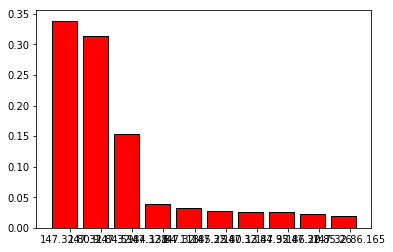

In [130]:
most_freq_ips = list(zip(most_freq.index, np.reshape(most_freq.values, -1)))
print(most_freq_ips)
histogram(most_freq_ips)

In [48]:
## A way with storing intermediate results -- THIS IS FOR OUR OWN UNDERSTANING OF SAMPLING
#assign random value from a uniform distribution [0,1)
df['rnd'] = np.random.rand(len(df))
#take 300 most lowest ones
df_rnd = df.sort_values(['rnd']).head(300)
#calculate frequency
df_rnd.groupby(['SrcIPAddr'])['SrcIPAddr'].agg({'Frequency':'count'}).sort_values(['Frequency'], ascending=False).head(10)

C:\Users\Anna\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,Frequency
SrcIPAddr,
147.32.84.59,37
147.32.80.9,35
147.32.84.138,18
147.32.80.13,6
147.32.84.118,6
147.32.86.187,4
147.32.84.111,4
147.32.84.95,4
147.32.86.20,4


In [188]:
## RESERVOIR algorithm

reservoir = queue.PriorityQueue(maxsize=1000)
for index, row in df.iterrows():
    r = np.random.rand(1)
    if(reservoir.full()):
#         print("reservoir is full")
        ips = reservoir.get()
        if (ips[0]<r):
            reservoir.put((r,row['SrcIPAddr']))
#             print("added")
        else:
            reservoir.put((ips[0],ips[1]))
#             print("not added")
    else:
        reservoir.put((r,row['SrcIPAddr']))
#         print("added")

ips = {}
while not reservoir.empty():
    ip = reservoir.get()[1]
    if(ip not in ips):
        ips[ip] = 0
    ips[ip] += 1
    

In [189]:
import operator
sorted_ips = sorted(ips.items(), key=operator.itemgetter(1),reverse=True)

most_freq_res = sorted_ips[:10]
most_freq_res

[('147.32.80.9', 124),
 ('147.32.84.59', 106),
 ('147.32.84.138', 56),
 ('147.32.84.118', 15),
 ('147.32.86.223', 14),
 ('147.32.85.25', 14),
 ('147.32.85.26', 11),
 ('147.32.80.13', 10),
 ('147.32.84.68', 10),
 ('147.32.84.95', 9)]

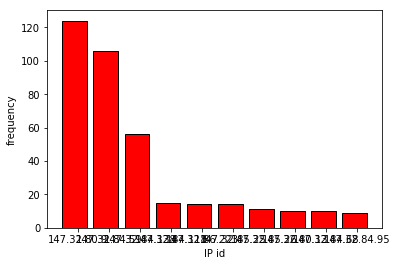

In [190]:
histogram(most_freq_res)

In [191]:
def calc_error(truth, estimated):
    #generate ids for IPs
    ips = [pair[0] for pair in truth]
    e_ips = [pair[0] for pair in estimated]
    val_id = len(truth)
    truth_ids = []
    estimated_ids = []
    for i in range(len(truth)):
        truth_ids.append((i, truth[i][1]))
        if truth[i][0] not in e_ips:
            estimated_ids.append((i, 0))
        if estimated[i][0] in ips:
            estimated_ids.append((ips.index(truth[i][0]), estimated[i][1]))
        else:
            estimated_ids.append((val_id, estimated[i][1]))
            truth_ids.append((val_id, 0))
            val_id+=1
    truth_ids.sort(key=lambda tup: tup[0])
    estimated_ids.sort(key=lambda tup: tup[0])
    histogram(truth_ids)
    histogram(estimated_ids)
    
    ##normalize the dataset
    truth_ids = normalize(truth_ids)
    estimated_ids = normalize(estimated_ids)
        
    intersect_area = 0
    for i in range(len(truth_ids)):
        intersect_area += min(truth_ids[i][1], estimated_ids[i][1]) 
    print('Itersection area: ', intersect_area)

    

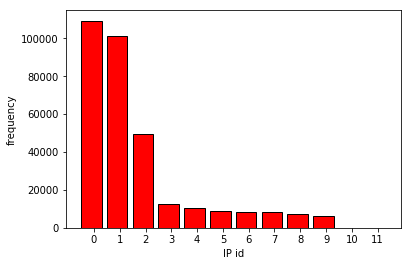

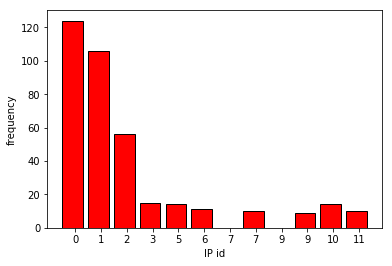

Itersection area:  0.9181996193017706


In [192]:
calc_error(most_freq_ips, most_freq_res)